Preparación  de entorno con librerías requeridas, el artículo de Medium: https://medium.com/@arnaizm95/los-sistemas-de-recomendación-aaf03e305c4c


In [ ]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357238 sha256=d855972f0c5cdb64ffe39b15b80b571ace1db8ebd28aa1067ad71060e4a8dc84
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
#conda install -c conda-forge scikit-surprise

In [ ]:
#Importacion de librerías
import pandas as pd
from surprise import KNNBasic, KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

Para la lectura del archivo disponemos de la función Reader en Surprise, se utiliza para especificar el formato del dataset y el rango de las calificaciones. Permite a los usuarios definir cómo se deben interpretar los datos del archivo de entrada (por ejemplo, un archivo CSV) para que Surprise pueda procesarlos correctamente.



In [ ]:
#Lectura del archivo con la función Reader de Surprise
reader = Reader(line_format='user item rating timestamp', sep='::')
data = Dataset.load_from_file('/content/ratings (1).dat', reader=reader)

Por ponernos en contexto, podemos realizar una representación de la distribución de los ratings

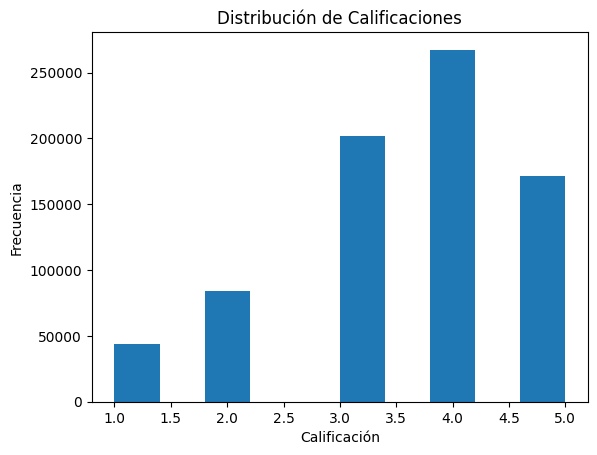

In [ ]:
import matplotlib.pyplot as plt

# Extraer las calificaciones
ratings = [(row[0], row[1], row[2]) for row in data.raw_ratings]
users, items, scores = zip(*ratings)

# Creamos un histograma de las calificaciones
plt.hist(scores, bins=10)
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificaciones')
plt.show()



In [ ]:
#Dividimos los datos en conjuntos de entrenamiento y validación
train, test = train_test_split(data, test_size=0.3)

Definimos los modelos de aprendizaje, knn y kMeans, con el mismo factor k=50, lo que a priori parece similar, en K-means, k define la cantidad de clusters, mientras que en KNN, k determina el número de vecinos considerados para clasificar o predecir. La elección del valor adecuado de k es crítica en ambos casos para asegurar el buen rendimiento del modelo.

In [ ]:
#Establecemos los modelos KNN y KMeans para probar cuál funciona mejor
knn = KNNBasic(k=50, sim_options={'name': 'pearson', 'user_based': True})
kMeans = KNNWithMeans(k=50, sim_options={'name': 'cosine','user_based': False})

In [ ]:
#Entrenamiento de modelo
knn.fit(train)
kMeans.fit(train)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
#Realizamos la predicción de puntuaciones con los dos modelos, apreciando que son muy similares
user_id = 42
item_id = 7
knn_user_prediction = knn.predict(user_id, item_id)
kMeans_user_prediction = kMeans.predict(user_id, item_id)

print("KNN Prediction:", knn_user_prediction.est)
print("KMeans Prediction:", kMeans_user_prediction.est)

KNN Prediction: 3.568639943532209
KMeans Prediction: 3.568639943532209


Validación del modelo: RMSE(Root Mean Squared Error) o Error Cuadrático Medio es una métrica utilizada para evaluar la precisión de un modelo de predicción, particularmente en el contexto de modelos de regresión. Es una medida de la diferencia promedio entre los valores predichos por el modelo y los valores observados (reales).

In [ ]:
#Validamos el modelo con métricas, en este caso con la aplicación del error cuadrático medio

knn_test_predictions = knn.test(test)
kMeans_test_predictions = kMeans.test(test)
knn_rmse = accuracy.rmse(knn_test_predictions)
kMeans_rmse = accuracy.rmse(kMeans_test_predictions)

RMSE: 0.9638
RMSE: 0.8972


In [ ]:
print("KNN RMSE: " + str(knn_rmse))
print("KMeans RMSE: " + str(kMeans_rmse))

KNN RMSE: 0.9638255883001481
KMeans RMSE: 0.8971854827683942


Comprobando los resultados de las métricas se observa que el modelo KNN obtiene resultados mucho más precisos. Kmeans al ser una técnica de aprendizaje no supervisado quizás requiera de una selección del nº de clusters más optimizada. Las métricas obtenidas en el modelo KNN son prometedoras.

In [ ]:
# Obtenemos la predicción de los k vecinos más cercanos de un usuario concreto
uid = 196 # Por ejemplo, usuario con ID 196

k = 10  # número de vecinos

# Obtener los k vecinos más cercanos
neighbors = knn.get_neighbors(uid, k)

# Convertir los índices internos de nuevo a los ids originales
neighbors_ids = [knn.trainset.to_raw_uid(inner_id) for inner_id in neighbors]

print(f"Los {k} vecinos más cercanos a {uid} son: {neighbors_ids}")


Los 10 vecinos más cercanos a 196 son: ['417', '946', '3583', '1906', '4031', '2128', '1566', '1638', '2647', '3893']
